In [3]:
path='img.jpg'

libpng warning: iCCP: known incorrect sRGB profile


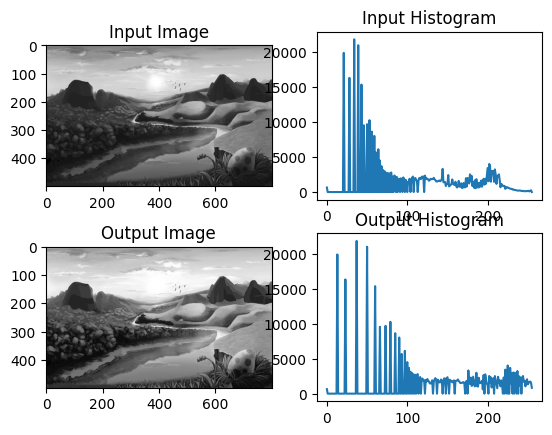

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the input image
input_image = cv2.imread(path, 0)

# Calculate the histogram of the input image
input_hist = cv2.calcHist([input_image], [0], None, [256], [0, 256])

# Perform histogram equalization
output_image = cv2.equalizeHist(input_image)

# Calculate the histogram of the equalized image
output_hist = cv2.calcHist([output_image], [0], None, [256], [0, 256])

# Plot the input and output histograms
plt.subplot(221), plt.imshow(input_image, 'gray'), plt.title('Input Image')
plt.subplot(222), plt.plot(input_hist), plt.title('Input Histogram')
plt.subplot(223), plt.imshow(output_image, 'gray'), plt.title('Output Image')
plt.subplot(224), plt.plot(output_hist), plt.title('Output Histogram')

plt.show()


In [2]:
# Custom function to calculate histogram
def calculate_histogram(image):
    height, width = image.shape
    hist = [0.0] * 256
    for i in range(height):
        for j in range(width):
            hist[image[i, j]] += 1
    return hist

# Custom function to perform histogram equalization
def histogram_equalization(image, hist):
    height, width = image.shape
    total_pixels = height * width
    cum_histogram = [sum(hist[:i+1]) for i in range(len(hist))]
    equalized_image = np.empty_like(image)

    for i in range(height):
        for j in range(width):
            equalized_image[i, j] = round((cum_histogram[image[i, j]] / total_pixels) * 255)

    return equalized_image

# Read the input image
input_image = cv2.imread(path, 0)

# Calculate the histogram of the input image
input_hist = calculate_histogram(input_image)

# Perform histogram equalization
output_image = histogram_equalization(input_image, input_hist)

# Calculate the histogram of the equalized image
output_hist = calculate_histogram(output_image)

# Plotting the input and output histograms
plt.subplot(221), plt.imshow(input_image, 'gray'), plt.title('Input Image')
plt.subplot(222), plt.plot(input_hist), plt.title('Input Histogram')
plt.subplot(223), plt.imshow(output_image, 'gray'), plt.title('Output Image')
plt.subplot(224), plt.plot(output_hist), plt.title('Output Histogram')

plt.show()


NameError: name 'path' is not defined

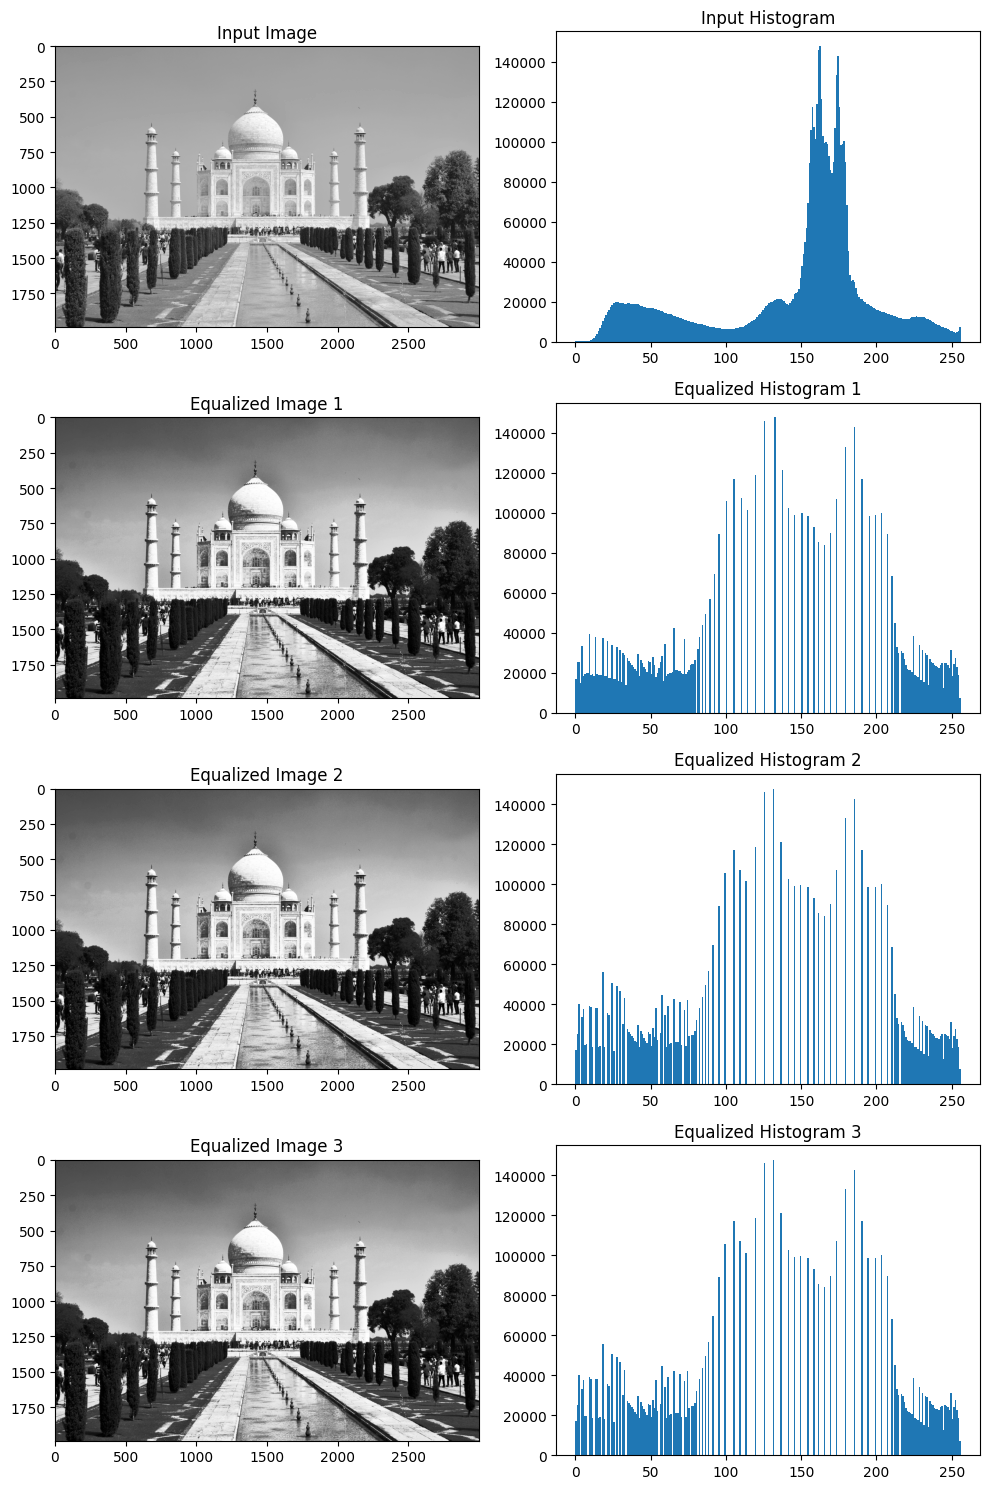

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Custom function to perform histogram equalization
def histogram_equalization(image):
    flat_img = image.flatten()
    hist, bins = np.histogram(flat_img, 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min())*255 / (cdf_m.max()-cdf_m.min())
    cdf = np.ma.filled(cdf_m,0).astype('uint8')

    equalized_image = cdf[flat_img].reshape(image.shape)

    return equalized_image

# Read the input image
input_image = cv2.imread(path, 0)

# Perform histogram equalization multiple times and compare the results
iterations = 3
fig, axs = plt.subplots(iterations+1, 2, figsize=(10, 15))

axs[0, 0].imshow(input_image, 'gray'), axs[0, 0].set_title('Input Image')
axs[0, 1].hist(input_image.flatten(), 256, [0, 256]), axs[0, 1].set_title('Input Histogram')

for i in range(iterations):
    equalized_image = histogram_equalization(input_image)
    axs[i+1, 0].imshow(equalized_image, 'gray'), axs[i+1, 0].set_title(f'Equalized Image {i+1}')
    axs[i+1, 1].hist(equalized_image.flatten(), 256, [0, 256]), axs[i+1, 1].set_title(f'Equalized Histogram {i+1}')
    
    input_image = equalized_image  # Set the equalized image as the input for the next iteration

plt.tight_layout()
plt.show()


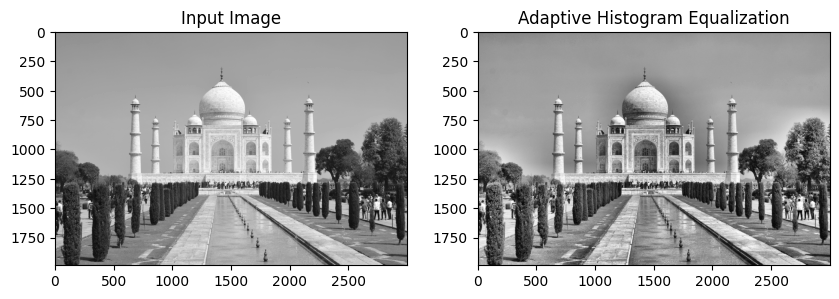

In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the input image in grayscale
input_image = cv2.imread(path, 0)

# Create an instance of the CLAHE (Contrast Limited Adaptive Histogram Equalization) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Apply CLAHE to the input image
output_image = clahe.apply(input_image)

# Display the input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Input Image')
plt.subplot(1, 2, 2), plt.imshow(output_image, cmap='gray'), plt.title('Adaptive Histogram Equalization')
plt.show()


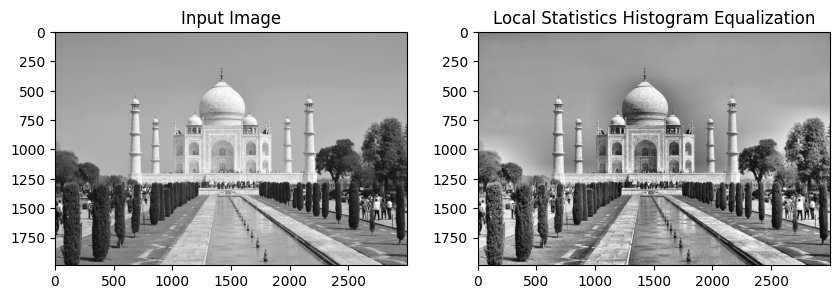

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the input image
input_image = cv2.imread(path, 0)

# Create an instance of the CLAHE (Contrast Limited Adaptive Histogram Equalization) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the input image
output_image = clahe.apply(input_image)

# Display the original and the equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.imshow(input_image, cmap='gray'), plt.title('Input Image')
plt.subplot(1, 2, 2), plt.imshow(output_image, cmap='gray'), plt.title('Local Statistics Histogram Equalization')
plt.show()


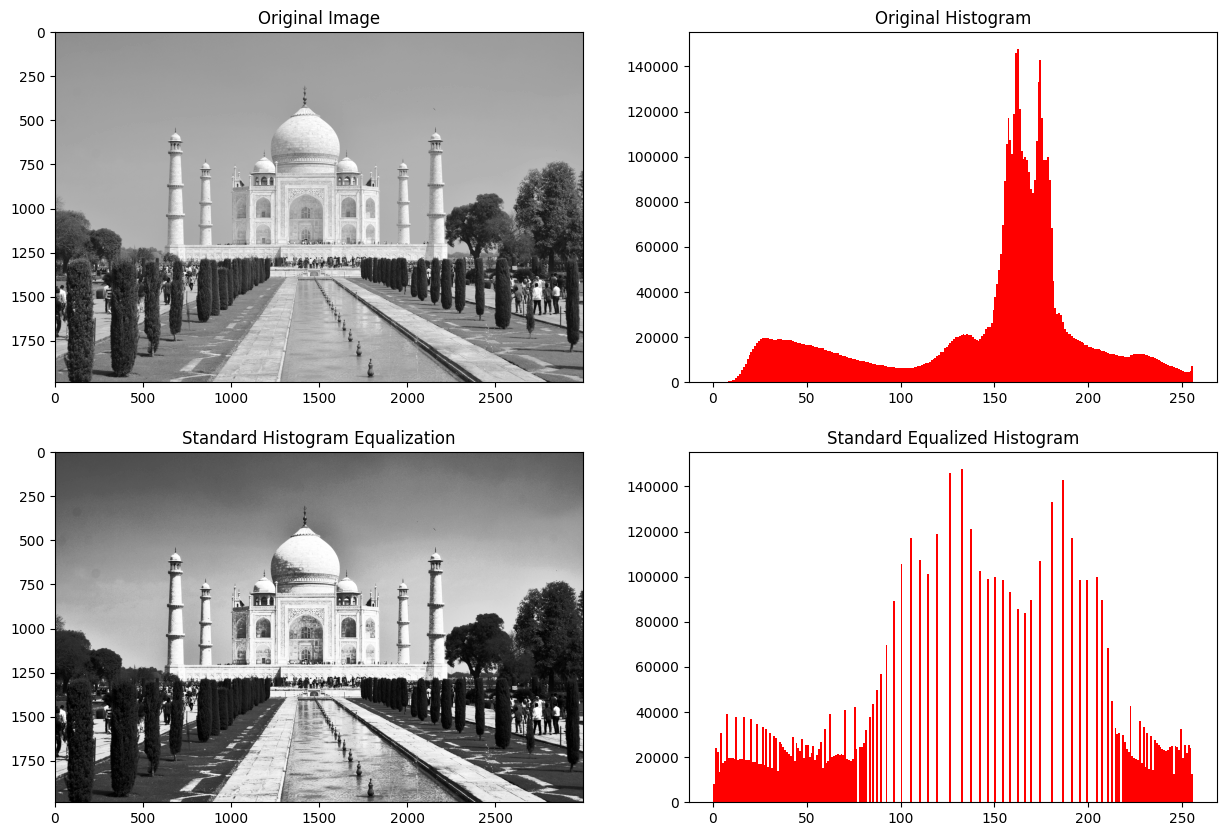

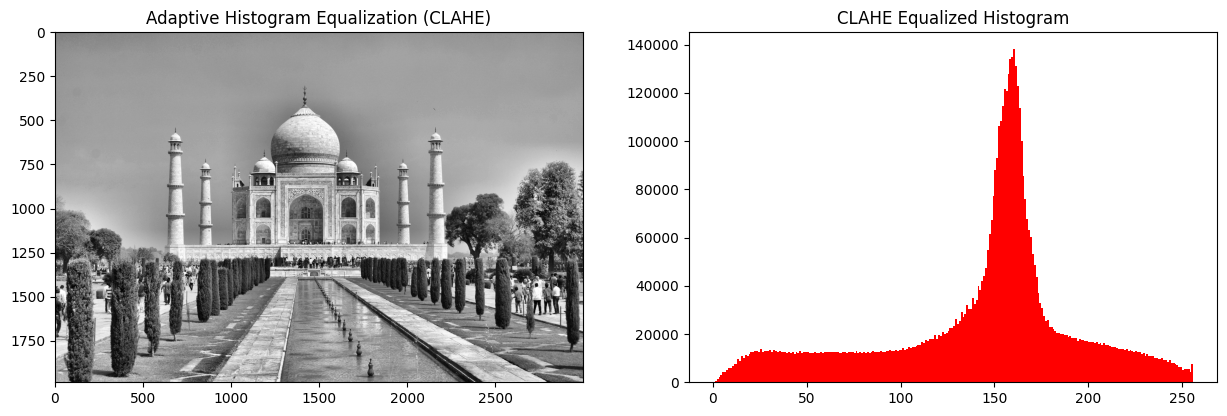

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the input image
input_image = cv2.imread(path, 0)

# Perform standard histogram equalization
standard_output_image = cv2.equalizeHist(input_image)

# Create an instance of the CLAHE (Contrast Limited Adaptive Histogram Equalization) object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the input image
clahe_output_image = clahe.apply(input_image)

# Displaying the original image and the processed images for comparison
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.hist(input_image.flatten(), 256, [0, 256], color='r')
plt.title('Original Histogram')

plt.subplot(2, 2, 3)
plt.imshow(standard_output_image, cmap='gray')
plt.title('Standard Histogram Equalization')

plt.subplot(2, 2, 4)
plt.hist(standard_output_image.flatten(), 256, [0, 256], color='r')
plt.title('Standard Equalized Histogram')

plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(clahe_output_image, cmap='gray')
plt.title('Adaptive Histogram Equalization (CLAHE)')

plt.subplot(2, 2, 2)
plt.hist(clahe_output_image.flatten(), 256, [0, 256], color='r')
plt.title('CLAHE Equalized Histogram')

plt.show()
